In [181]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [447]:
mm = pd.read_csv("mmALL_073120_csv.csv")
mm = mm.query('protest == 1')
mm = mm.reset_index()

In [448]:
mm.columns # country-region-location, year, start-end, violence, amt of protesters, protesteridentity, demands, responses

Index(['index', 'id', 'country', 'ccode', 'year', 'region', 'protest',
       'protestnumber', 'startday', 'startmonth', 'startyear', 'endday',
       'endmonth', 'endyear', 'protesterviolence', 'location',
       'participants_category', 'participants', 'protesteridentity',
       'protesterdemand1', 'protesterdemand2', 'protesterdemand3',
       'protesterdemand4', 'stateresponse1', 'stateresponse2',
       'stateresponse3', 'stateresponse4', 'stateresponse5', 'stateresponse6',
       'stateresponse7', 'sources', 'notes'],
      dtype='object')

## how does state response vary?

In [449]:
mm.stateresponse1.unique()

array(['ignore', 'accomodation', 'crowd dispersal', 'arrests',
       'shootings', 'beatings', 'killings', nan], dtype=object)

In [450]:
for r in mm.region.unique():
    re = r
    print(r+": ")
    print(mm.query("region == @re").country.unique())
    print("---")

North America: 
['Canada' 'Cuba' 'Haiti' 'Dominican Republic' 'Jamaica' 'Mexico']
---
Central America: 
['Guatemala' 'Honduras' 'El Salvador' 'Nicaragua' 'Costa Rica' 'Panama']
---
South America: 
['Colombia' 'Venezuela' 'Guyana' 'Suriname' 'Ecuador' 'Peru' 'Brazil'
 'Bolivia' 'Paraguay' 'Chile' 'Argentina' 'Uruguay']
---
Europe: 
['United Kingdom' 'Ireland' 'Netherlands' 'Belgium' 'Luxembourg' 'France'
 'Switzerland' 'Spain' 'Portugal' 'Germany' 'Germany West' 'Germany East'
 'Poland' 'Austria' 'Hungary' 'Czechoslovakia' 'Czech Republic'
 'Slovak Republic' 'Italy' 'Albania' 'Kosovo' 'Serbia' 'Macedonia'
 'Croatia' 'Yugoslavia' 'Bosnia' 'Serbia and Montenegro' 'Montenegro'
 'Slovenia' 'Greece' 'Cyprus' 'Bulgaria' 'Moldova' 'Romania' 'USSR'
 'Russia' 'Estonia' 'Latvia' 'Lithuania' 'Ukraine' 'Belarus' 'Armenia'
 'Georgia' 'Azerbaijan' 'Finland' 'Sweden' 'Norway' 'Denmark']
---
Africa: 
['Cape Verde' 'Guinea-Bissau' 'Equatorial Guinea' 'Gambia' 'Mali'
 'Senegal' 'Benin' 'Mauritania' 'Nige

In [451]:
def quantify_stateresponse(col):
    nums = []
    response_dict = {"accomodation":3, "crowd dispersal":-1,"arrests":-2,"beatings":-3,"shootings":-4,"killings":-5,"ignore":0}
    for r in col:
        if r in response_dict: nums.append(response_dict[r])
        else: nums.append(0)
    return nums

In [452]:
quantified = mm[["stateresponse1","stateresponse2","stateresponse3","stateresponse4","stateresponse5","stateresponse6","stateresponse7"]]
quantified = quantified.apply(quantify_stateresponse)
mm["stateresponse_sum"] = quantified.sum(axis=1)

### does it correlate with location?

In [453]:
mm.region.unique()

array(['North America', 'Central America', 'South America', 'Europe',
       'Africa', 'MENA', 'Asia', 'Oceania'], dtype=object)

In [454]:
len(mm.country.unique())

166

In [455]:
mm.region = [x.replace(" ", '\n') for x in mm.region.to_list()]
# mm.country = [x.replace(" ", '\n') for x in mm.country.to_list()]

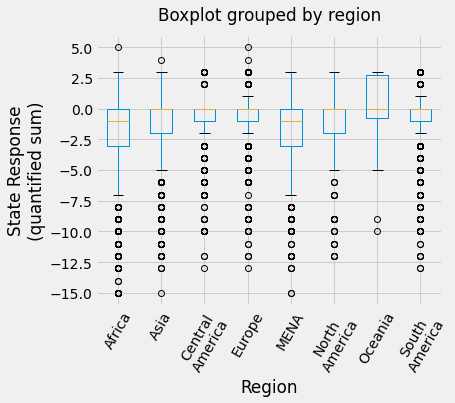

In [456]:
mm.boxplot(by = 'region', column = 'stateresponse_sum', figsize = [6,5], rot = 60)
plt.xlabel('Region')
plt.ylabel('State Response\n(quantified sum)')
plt.title('')
plt.savefig("stateresponse_region", dpi=400, bbox_inches = 'tight')

In [457]:
top_countries = pd.DataFrame(mm.country.value_counts()).reset_index()
top_countries = top_countries.rename(columns = {'country':'count','index':'country'}).query('count > 200')
# len(top_countries.query('count > 150'))

In [458]:
mm_topcountries = mm[mm['country'].isin(top_countries.country)]

# cr_means = {} #cr for country_response
# for c in mm.country.unique():
#     co = c
#     cr_means[co] = cr_means.get(co, mm.query('country == @co').stateresponse_sum.mean())
    
# mean_countryresponse = []
# for i in mm_topcountries.index:
#     mean_countryresponse.append(cr_means[mm_topcountries.country[i]])
# mm_topcountries['mean_countryresponse'] = mean_countryresponse

In [459]:
# mm_topcountries.sort_values('mean_countryresponse').country.unique()
# mm_topcountries = mm_topcountries.sort_values('mean_countryresponse')

In [460]:
# stateresponse_demand.protesterdemand = [x.replace("labor wage dispute", 'labor wage\ndispute') for x in stateresponse_demand.protesterdemand.to_list()]
# mm_topcountries.country = [x.replace("United Kingdom", 'UK') for x in mm_topcountries.country.to_list()]
# mm_topcountries.country = [x.replace("South Korea", 'S Korea') for x in mm_topcountries.country.to_list()]

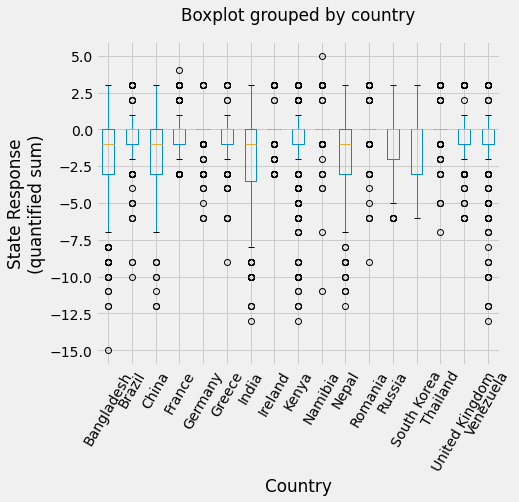

In [461]:
mm_topcountries.boxplot(by = 'country', column = 'stateresponse_sum', figsize = [7,6], rot = 60)
plt.xlabel('Country')
plt.ylabel('State Response\n(quantified sum)')
plt.title('')

plt.savefig("stateresponse_country", dpi=400, bbox_inches = 'tight')

In [462]:
freedom.columns

Index(['country', 'humanFreedom', 'hfRank', 'persFreedom', 'econFreedom',
       'quartile'],
      dtype='object')

In [463]:
freedom = pd.read_csv('countryfreedom.csv')
mm_freedom = pd.merge(mm_topcountries, freedom, on = 'country', how = 'left')
mm_freedom = mm_freedom[['country','region','stateresponse_sum','country','persFreedom']]

In [464]:
mm_freedom.persFreedom.unique()

array([4.9 , 7.64, 9.19, 9.4 , 8.91, 9.32, 8.37, 8.65, 5.9 , 6.59, 8.12,
       4.87, 8.94, 6.2 , 5.52, 7.41, 6.9 ])

In [476]:
mm_freedom.query('persFreedom == 7.64').quantile(.1).stateresponse_sum

-2.6999999999999993

In [489]:
freeminy = []
freeminx = []
for v in mm_freedom.persFreedom.unique():
    va = v
    freeminx.append(va)
    freeminy.append(mm_freedom.query('persFreedom == @va').quantile(.0001).stateresponse_sum)

In [490]:
# freex = np.array(mm_freedom.persFreedom).reshape(-1,1)
# freey = np.array(mm_freedom.stateresponse_sum).reshape(-1,1)
# modelfree = LinearRegression().fit(freex, freey)
# mfree = modelfree.coef_[0][0]
# bfree = modelfree.intercept_[0]
# modelfree.score(freex, freey), mfree, bfree

freex = np.array(freeminx).reshape(-1,1)
freey = np.array(freeminy).reshape(-1,1)
modelfree = LinearRegression().fit(freex, freey)
mfree = modelfree.coef_[0][0]
bfree = modelfree.intercept_[0]
modelfree.score(freex, freey), mfree, bfree

(0.5174932461489969, 1.6885896014275295, -21.62527171465021)

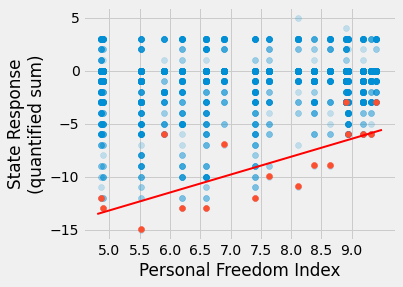

In [512]:
plt.figure(figsize = [5,4])
plt.scatter(mm_freedom.persFreedom, mm_freedom.stateresponse_sum, alpha = .2)
plt.scatter(freeminx, freeminy)
freelims = np.array([4.8,9.5])
plt.xticks(np.arange(5,9.5,.5))
plt.plot(freelims, freelims*mfree + bfree, c = 'red', lw = 2)
plt.xlabel('Personal Freedom Index')
plt.ylabel('State Response\n(quantified sum)')
plt.savefig("freedom", dpi=400, bbox_inches = 'tight')

### by duration?

In [556]:
start = mm[['startyear', 'startmonth', 'startday']]
start = start.rename(columns = {'startyear':'year','startmonth':'month','startday':'day'})
mm['start'] = pd.to_datetime(start,yearfirst = True)

end = mm[['endyear', 'endmonth', 'endday']]
end = end.rename(columns = {'endyear':'year','endmonth':'month','endday':'day'})
mm['end'] = pd.to_datetime(end,yearfirst = True)

mm['duration'] = (mm.end - mm.start).dt.days

In [16]:
mm.duration.quantile(.999)

175.3340000000171

In [17]:
mm_regduration = mm.query('duration <= 100')
mm_longduration = mm.query('duration > 100')

In [99]:
yval = mm_regduration.query('stateresponse_sum == -10')
g = yval.query('duration > 20')
g.duration

10463    51
11081    53
13482    21
13534    43
15235    25
Name: duration, dtype: int64

In [507]:
duration_response99x_all, duration_response99y_all = [], []
duration_response99x, duration_response99y = [], []
for s in mm_regduration.stateresponse_sum.unique():
    ss = s
    yval = mm_regduration.query('stateresponse_sum == @ss')
    q99 = yval.duration.quantile(.9)
    duration_response99y.append(ss)
    duration_response99x.append(q99)
    duration_response99y_all.append(ss)
    duration_response99x_all.append(q99)
    for g in yval.query('duration > @q99').duration:
        duration_response99y_all.append(ss)
        duration_response99x_all.append(g)

linreg99x = np.array(duration_response99x).reshape(-1,1)
linreg99y = np.array(duration_response99y).reshape(-1,1)
model99 = LinearRegression().fit(linreg99x, linreg99y)
m = model99.coef_[0][0]
b = model99.intercept_[0]
model99.score(linreg99x, linreg99y), m, b

(0.3402257931902507, 0.47831634244384363, -7.635295277178701)

In [382]:
len(mm), len(mm_regduration)

(15239, 15201)

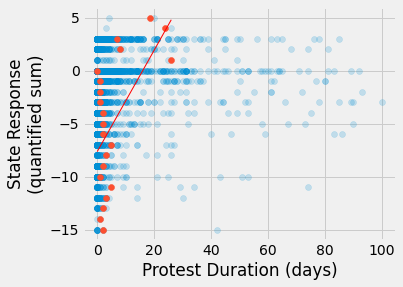

In [513]:
plt.figure(figsize = [5,4])
plt.scatter(mm_regduration.duration, mm_regduration.stateresponse_sum, alpha = .2)
plt.scatter(duration_response99x, duration_response99y)
# plt.scatter(duration_response99x_all, duration_response99y_all, c = 'red', alpha = .1)
xlims = np.array([0,26])
plt.plot(xlims, m * xlims + b, c = 'red', lw = 1)
plt.xlabel("Protest Duration (days)")
plt.ylabel("State Response\n(quantified sum)")
plt.savefig("stateresponse_duration", dpi=400, bbox_inches = 'tight')

Text(0, 0.5, 'State Response\n(quantified sum)')

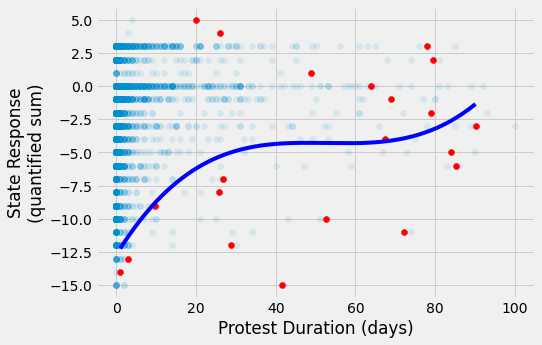

In [197]:
plt.figure(figsize = [7,5])
plt.scatter(mm_regduration.duration, mm_regduration.stateresponse_sum, alpha = .1)

X = linreg99x
y = linreg99y
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)
 
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 
 
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 


plt.xlabel("Protest Duration (days)")
plt.ylabel("State Response\n(quantified sum)")
# plt.savefig("stateresponse_duration", dpi=400, bbox_inches = 'tight')

### by protester demand?

In [557]:
mm.columns

Index(['index', 'id', 'country', 'ccode', 'year', 'region', 'protest',
       'protestnumber', 'startday', 'startmonth', 'startyear', 'endday',
       'endmonth', 'endyear', 'protesterviolence', 'location',
       'participants_category', 'participants', 'protesteridentity',
       'protesterdemand1', 'protesterdemand2', 'protesterdemand3',
       'protesterdemand4', 'stateresponse1', 'stateresponse2',
       'stateresponse3', 'stateresponse4', 'stateresponse5', 'stateresponse6',
       'stateresponse7', 'sources', 'notes', 'stateresponse_sum', 'start',
       'end', 'duration'],
      dtype='object')

In [641]:
stateresponse_demand1 = mm[['protesterdemand1','stateresponse_sum', 'protesterviolence', 'startyear', 'start']]
# stateresponse_demand1.protesterdemand1 = [str(x).replace(", ",",\n") for x in stateresponse_demand1.protesterdemand1.to_list()]
stateresponse_demand1 = stateresponse_demand1.rename(columns = {'protesterdemand1' : 'protesterdemand'})

stateresponse_demand2 = mm[['protesterdemand2','stateresponse_sum', 'protesterviolence','startyear', 'start']]
# stateresponse_demand2.protesterdemand2 = [str(x).replace(", ",",\n") for x in stateresponse_demand2.protesterdemand2.to_list()]
stateresponse_demand2 = stateresponse_demand2.rename(columns = {'protesterdemand2' : 'protesterdemand'})

stateresponse_demand3 = mm[['protesterdemand3','stateresponse_sum', 'protesterviolence','startyear', 'start']]
# stateresponse_demand3.protesterdemand3 = [str(x).replace(", ",",\n") for x in stateresponse_demand3.protesterdemand3.to_list()]
stateresponse_demand3 = stateresponse_demand3.rename(columns = {'protesterdemand3' : 'protesterdemand'})

stateresponse_demand4 = mm[['protesterdemand4','stateresponse_sum', 'protesterviolence','startyear', 'start']]
# stateresponse_demand4.protesterdemand4 = [str(x).replace(", ",",\n") for x in stateresponse_demand4.protesterdemand4.to_list()]
stateresponse_demand4 = stateresponse_demand4.rename(columns = {'protesterdemand4' : 'protesterdemand'})

stateresponse_demand = pd.concat([stateresponse_demand1, stateresponse_demand2, stateresponse_demand3, stateresponse_demand4])
# stateresponse_demand = stateresponse_demand.protesterdemand.fillna('.')

stateresponse_demand = stateresponse_demand.query('protesterdemand != "."')
stateresponse_demand = stateresponse_demand.query('protesterdemand != "nan"')

# sd_q25 = stateresponse_demand.quantile(.05).stateresponse_sum
# sd_q75 = stateresponse_demand.quantile(.95).stateresponse_sum
# stateresponse_demand_iqr = stateresponse_demand.query('stateresponse_sum >= @sd_q25')
# stateresponse_demand_iqr = stateresponse_demand_iqr.query('stateresponse_sum <= @sd_q75')

# sd_q25, sd_q75

In [603]:
type(stateresponse_demand.protesterdemand.to_list()[0])

str

In [604]:
# stateresponse_demand.protesterdemand = [x.replace("labor wage dispute", 'labor wage\ndispute') for x in stateresponse_demand.protesterdemand.to_list()]
# stateresponse_demand.protesterdemand = [x.replace("land farm issue", 'land farm\nissue') for x in stateresponse_demand.protesterdemand.to_list()]
# stateresponse_demand.protesterdemand = [x.replace("removal of politician", 'removal of\npolitician') for x in stateresponse_demand.protesterdemand.to_list()]
stateresponse_demand.protesterdemand = [x.replace("political behavior, process", 'governance') for x in stateresponse_demand.protesterdemand.to_list()]
# stateresponse_demand.protesterdemand = [x.replace("social restrictions", 'social\nrestrictions') for x in stateresponse_demand.protesterdemand.to_list()]
stateresponse_demand.protesterdemand = [x.replace("price, tax policy", 'price, tax') for x in stateresponse_demand.protesterdemand.to_list()]
# stateresponse_demand.protesterdemand = [x.replace("police brutality", 'police\nbrutality') for x in stateresponse_demand.protesterdemand.to_list()]

AttributeError: 'float' object has no attribute 'replace'

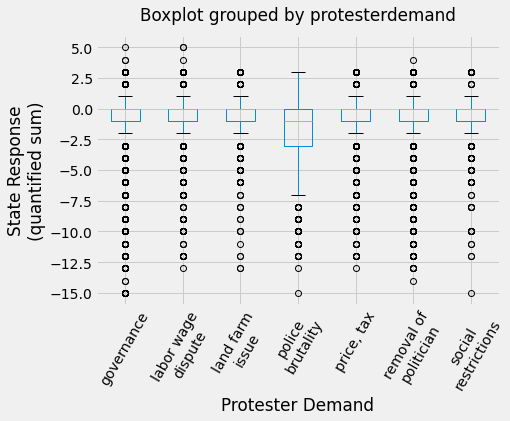

In [314]:
stateresponse_demand.boxplot(by = 'protesterdemand', column = 'stateresponse_sum', figsize = [7,5], rot = 60)
plt.title('')
plt.xlabel('Protester Demand')
plt.ylabel('State Response\n(quantified sum)')
plt.savefig("stateresponse_demand", dpi=400, bbox_inches = 'tight')

# more data!

In [587]:
demands = stateresponse_demand.protesterdemand

In [588]:
d = pd.DataFrame(demands.value_counts())
d['percents'] = d.protesterdemand / len(demands)
d

,protesterdemand,percents
"political behavior, process",10750,0.178536
labor wage dispute,2211,0.036720
removal of politician,1891,0.031406
"price increases, tax policy",1414,0.023484
police brutality,1101,0.018285
social restrictions,684,0.011360
land farm issue,582,0.009666


In [589]:
# plt.figure(figsize = [10,5])
# plt.bar(d.index, d.percents)

In [724]:
demands_year = pd.DataFrame()
for y in mm.startyear.unique():
    year = y
    yeardemands = stateresponse_demand.query('startyear == @year').protesterdemand
    yd = pd.DataFrame(yeardemands.value_counts())
    yd['percents'] = yd.protesterdemand / len(mm)
    yd['year'] = [y]*len(yd)
    demands_year = pd.concat([demands_year, yd])
demands_year = demands_year.reset_index()
demands_year = demands_year.rename(columns = {'index':'demand'})
demands_year = demands_year.sort_values('year')
# demands_year = demands_year.query('year >= 2000')
demands_year.year = demands_year.year.apply(int)

In [725]:
demands_year["demand"] = [x.replace("political behavior, process", 'governance') for x in demands_year['demand'].to_list()]
demands_year["demand"] = [x.replace("price increases, tax policy", 'price, tax') for x in demands_year['demand'].to_list()]

In [755]:
total = pd.DataFrame(mm.startyear.value_counts())
total = total.reset_index()
total = total.rename(columns = {'index':'year','startyear':'c'})
total.year = total.year.apply(int)
total = total.sort_values('year')

len(total.year), len(total.c)

(31, 31)

In [726]:
land.head(1).year

62    2000
Name: year, dtype: int64

In [727]:
governance = demands_year.query('demand == "governance"')
behead = demands_year.query('demand == "removal of politician"')
price = demands_year.query('demand == "price, tax"')
wage = demands_year.query('demand == "labor wage dispute"')
police = demands_year.query('demand == "police brutality"')
social = demands_year.query('demand == "social restrictions"')
land = demands_year.query('demand == "land farm issue"')

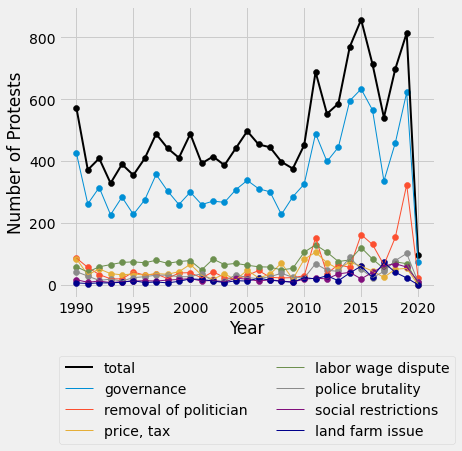

In [761]:
plt.figure(figsize = [6,5])

plt.scatter(total.year, total.c, c = 'black')
plt.plot(total.year, total.c, label = 'total', c = 'black', lw = 2)

plt.scatter(governance.year, governance.protesterdemand)
plt.scatter(behead.year, behead.protesterdemand)
plt.scatter(price.year, price.protesterdemand)
plt.scatter(wage.year, wage.protesterdemand)
plt.scatter(police.year, police.protesterdemand)
plt.scatter(social.year, social.protesterdemand)
plt.scatter(land.year, land.protesterdemand, c = 'darkblue')
plt.plot(governance.year, governance.protesterdemand, lw = 1, label = 'governance')
plt.plot(behead.year, behead.protesterdemand, lw = 1, label = 'removal of politician')
plt.plot(price.year, price.protesterdemand, lw = 1, label = 'price, tax')
plt.plot(wage.year, wage.protesterdemand, lw = 1, label = 'labor wage dispute')
plt.plot(police.year, police.protesterdemand, lw = 1, label = 'police brutality')
plt.plot(social.year, social.protesterdemand, lw = 1, label = 'social restrictions')
plt.plot(land.year, land.protesterdemand, lw = 1, c = 'darkblue', label = 'land farm issue')

plt.legend(ncol = 2, loc = (0, -.5))
plt.xticks(np.arange(1990,2021,5))

plt.xlabel('Year')
plt.ylabel('Number of Protests')

plt.savefig("demand_year", dpi=400, bbox_inches = 'tight')

In [775]:
mm.query('startyear < 1994')[['participants','country','year','protesterdemand1','protesteridentity','notes']].head(100)#.query('participants == "1 million"')

,participants,country,year,protesterdemand1,protesteridentity,notes
0,1000s,Canada,1990,"political behavior, process",unspecified,canada s railway passenger system was finally ...
1,1000,Canada,1990,"political behavior, process",unspecified,protestors were only identified as young peopl...
2,500,Canada,1990,"political behavior, process",separatist parti quebecois,"the queen, after calling on canadians to remai..."
3,100s,Canada,1990,land farm issue,mohawk indians,canada s federal government has agreed to acqu...
4,950,Canada,1990,"political behavior, process",local residents,protests were directed against the state due t...
...,...,...,...,...,...,...
982,14000,Colombia,1990,"political behavior, process",banana workers,general strike
983,10000,Colombia,1990,"price increases, tax policy",workers,general strike and demonstration
984,200000,Colombia,1991,police brutality,teachers,general strike
985,30000,Colombia,1991,"political behavior, process",farm workers,blocking roads


In [792]:
mm_regduration.sort_values('stateresponse_sum')\
.sort_values('duration', ascending = False).sort_values('stateresponse_sum')\
.query('duration > 10')\
[['duration','country','stateresponse_sum','startyear','sources','notes']]\
.tail(10)

,duration,country,stateresponse_sum,startyear,sources,notes
12322,21,Uzbekistan,3,2003.0,workers strike over unpaid wages in eastern uz...,"meanwhile, employees of the fergana oil refine..."
13671,21,Pakistan,3,2007.0,"the new york times, february 21, 2007 wednesda...",against demolition of illegal mosques
3022,20,United Kingdom,3,2011.0,"woman, 28, raped in tent at glasgow protest ca...",? a young woman was raped at an anticapitalist...
14504,20,Thailand,3,2000.0,"the nation thailand june 4, 2000, protesters m...",electricity generating authority of thailand
3901,20,France,3,1997.0,1 staff of troubled paris bank hold executives...,1 workers at the paris headquarters of credit ...
6329,21,Moldova,3,1995.0,moldova students suspend strike. agence france...,exact start date is unclear. thousands of stud...
1517,21,Suriname,3,2010.0,"caribbean net news, grand cayman, cayman islan...",strike
1479,21,Suriname,3,1995.0,"associated press worldstream, march 22, 1995; ...",general strike police
3916,26,France,4,1997.0,1 french jobless seize unemployment offices to...,1 jobless demonstrators occupied nine employme...
10330,20,Namibia,5,2010.0,1 tertiary students fight change. the namibian...,1 angry windhoek college of education students...
